In [14]:
%load_ext autoreload
%autoreload 2
import random
from subprocess import call

# tell jupyter notebook to show plots inline (with output)
%matplotlib inline
import pandas as pd
import numpy as np
from scipy.stats.distributions import norm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# tell whiny modules to shut up about it 
warnings.simplefilter('ignore', np.RankWarning)
warnings.filterwarnings("ignore", module="matplotlib")
warnings.filterwarnings("ignore", module="statsmodels")

import netgen as ng

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [744]:
ng.configureSweep(popscale=0.5, Stim=[2.3], StimDelta=[0.5])

1

In [759]:
ng.compileAndRunSweep(30,60,1)

In [760]:
results = ng.readAllTrialResults(90,0,1)

In [768]:
results[0][0]['Stim']

2.3

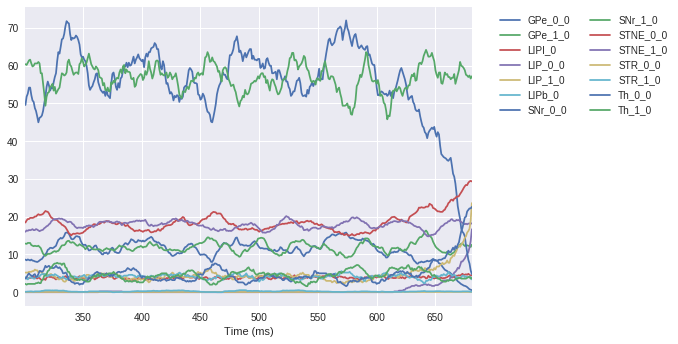

In [723]:
results[0][0]['popfreqs'].plot(x='Time (ms)')
# _ = plt.legend(fontsize=13)
ax = plt.subplot(111)
ax.legend(loc='upper center', bbox_to_anchor=(1.25, 1),
          ncol=2, fancybox=True, shadow=True)

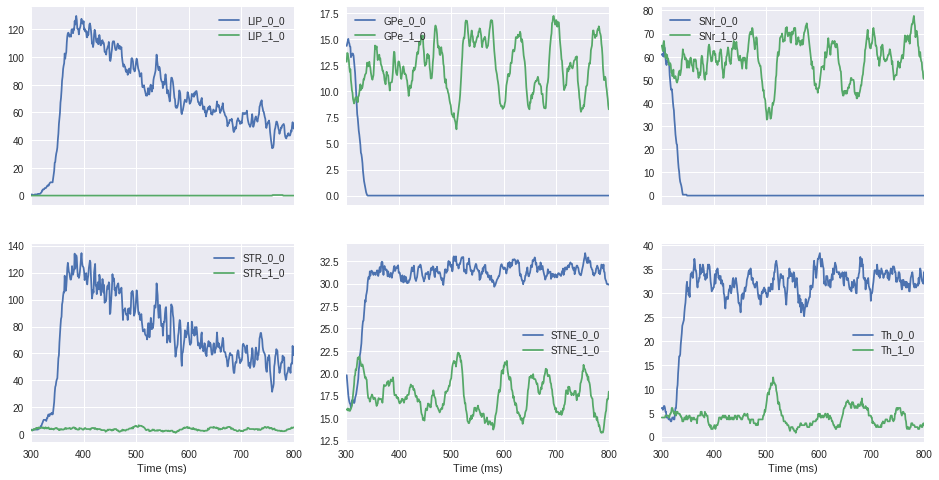

In [767]:
f, (ax1, ax2) = plt.subplots(2, 3, figsize=(16,8), sharex=True)
result = results[0][9]
for i in range(0,result['dims']['choices']):
    result['popfreqs'].plot(x='Time (ms)', y='LIP_'+str(i)+'_0', ax=ax1[0])
    result['popfreqs'].plot(x='Time (ms)', y='GPe_'+str(i)+'_0', ax=ax1[1])
    result['popfreqs'].plot(x='Time (ms)', y='SNr_'+str(i)+'_0', ax=ax1[2])
    result['popfreqs'].plot(x='Time (ms)', y='STR_'+str(i)+'_0', ax=ax2[0])
    result['popfreqs'].plot(x='Time (ms)', y='STNE_'+str(i)+'_0', ax=ax2[1])
    result['popfreqs'].plot(x='Time (ms)', y='Th_'+str(i)+'_0', ax=ax2[2])

for ax, axx in zip(ax1, ax2):
    ax.set_xlim(300, ax.get_xlim()[-1])
    axx.set_xlim(300, ax.get_xlim()[-1])
        
# plt.savefig('/home/mclapp/firing_rates.png')

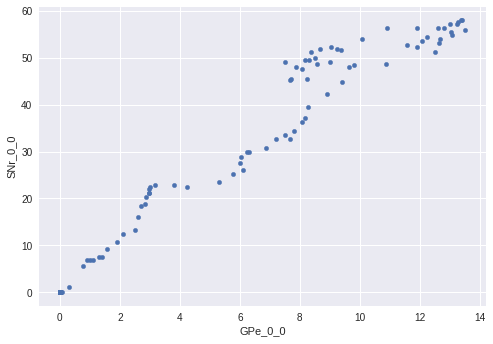

In [769]:
results[0][0]['popfreqs'].plot(x='GPe_0_0', y='SNr_0_0', kind='scatter')

In [761]:
delays = []
for result in results[0]:
    delays.append(ng.findOutputs(result)['decision made']['delay'])
delays

[64.003814697265625,
 58.003448486328125,
 53.003143310546875,
 58.003448486328125,
 47.002777099609375,
 56.003326416015625,
 53.003143310546875,
 57.003387451171875,
 60.003570556640625,
 43.002532958984375,
 155.00936889648438,
 58.003448486328125,
 51.003021240234375,
 73.004364013671875,
 60.003570556640625,
 87.005218505859375,
 51.003021240234375,
 65.003875732421875,
 63.003753662109375,
 62.003692626953125,
 44.002593994140625,
 58.003448486328125,
 36.002105712890625,
 59.003509521484375,
 36.002105712890625,
 72.004302978515625,
 40.002349853515625,
 84.005035400390625,
 78.004669189453125,
 44.002593994140625,
 47.002777099609375,
 46.002716064453125,
 65.003875732421875,
 63.003753662109375,
 57.003387451171875,
 77.004608154296875,
 63.003753662109375,
 58.003448486328125,
 57.003387451171875,
 44.002593994140625,
 66.003936767578125,
 67.003997802734375,
 67.003997802734375,
 58.003448486328125,
 58.003448486328125,
 53.003143310546875,
 46.002716064453125,
 51.003021240

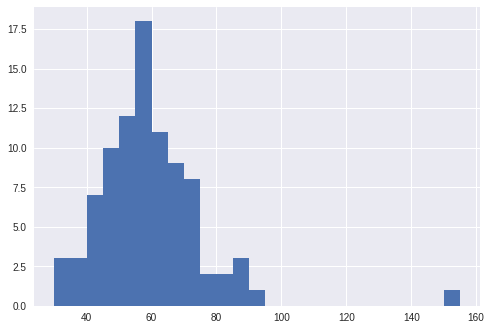

In [770]:
reactions = pd.Series(delays)
reactions.hist(bins=25)
# plt.hist(reactions, bins=[0, 10, 20, 30, 40, 50, 60,70,80,90,100,110,120,130,140,150,160,170])
plt.savefig('/home/mclapp/RTS.png')